---
title: "R Notebook"
output:
  html_document: default
  html_notebook: default
---

---
title: "Simple regression"
subtitle: "Forecasting: principles and practice"
author: "book by Rob Hyndman and George Athanasopoulos </br> slides by Peter Fuleky"
date: "`r format(Sys.time(), '%d %B, %Y')`"
output: ioslides_presentation
---


## Simple linear regression

The basic concept is that we forecast variable $y$ assuming it has a linear relationship with variable $x$.

$$y = \beta_0 + \beta_1 x + \varepsilon .$$

The model is called *simple* regression as we only allow one predictor variable $x$.
The *forecast variable* $y$ is sometimes also called the regressand, dependent or explained variable. The *predictor variable* $x$ is sometimes also called the regressor, independent or explanatory variable.

The parameters $\beta_0$ and $\beta_1$ determine the intercept and the slope of the line respectively. The intercept $\beta_0$ represents the predicted value of $y$ when $x=0$. The slope $\beta_1$ represents the predicted increase in $Y$ resulting from a one unit increase in $x$.


## Example

![Linear regression](https://www.otexts.org/sites/default/files/resize/fpp/images/Fig_CH4_SLRpop1-570x350.png)

We can think of each observation $y_i$ consisting of the systematic or explained part of the model, $\beta_0+\beta_1x_i$, and the random *error*, $\varepsilon_i$.


## The error $\varepsilon_i$

captures anything that may affect $y_i$ other than $x_i$. We assume that these errors:

- have mean zero; otherwise the forecasts will be systematically biased.
- are not autocorrelated; otherwise the forecasts will be inefficient as there is more information to be exploited in the data.
- are unrelated to the predictor variable; otherwise there would be more information that should be included in the systematic part of the model.

It is also useful to have the errors normally distributed with constant variance in order to produce prediction intervals and to perform statistical inference.

***

Another important assumption in the simple linear model is that $x$ is not a random variable. 

If we were performing a controlled experiment in a laboratory, we could control the values of $x$ (so they would not be random) and observe the resulting values of $y$. 

With observational data (including most data in business and economics) it is not possible to control the value of $x$, and hence we make this an assumption.


## Least squares estimation

In practice, we have a collection of observations but we do not know the values of $\beta_0$ and $\beta_1$. These need to be estimated from the data. We call this *fitting a line through the data*.

There are many possible choices for $\beta_0$ and $\beta_1$, each choice giving a different line. 

The least squares principle provides a way of choosing $\beta_0$ and $\beta_1$ effectively by minimizing the sum of the squared errors. The values of $\beta_0$ and $\beta_1$ are chosen so that that minimize

$$\sum_{i=1}^N \varepsilon_i^2 = \sum_{i=1}^N (y_i - \beta_0 - \beta_1x_i)^2. $$

***

Using mathematical calculus, it can be shown that the resulting **least squares estimators** are

$$\hat{\beta}_1=\frac{ \sum_{i=1}^{N}(y_i-\bar{y})(x_i-\bar{x})}{\sum_{i=1}^{N}(x_i-\bar{x})^2} $$ 

and

$$\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}, $$

where $\bar{x}$ is the average of the $x$ observations and $\bar{y}$ is the average of the $y$ observations. The estimated line is known as the *regression line*.

***

![Estimated regression line for a random sample of size N.](https://www.otexts.org/sites/default/files/resize/fpp/images/Fig_CH4_SLRpop2-570x350.png)

We do not know $\beta_0$ and $\beta_1$ for the *true* line $y=\beta_0+\beta_1x$, so we cannot use this line for forecasting.

Therefore we obtain estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ from the observed data to give the *regression line* used for forecasting: for each value of $x$, we can forecast a corresponding value of $y$ using $\hat{y}=\hat{\beta}_0+\hat{\beta}_1x$.


## Fitted values and residuals

The forecast values of $y$ obtained from the observed $x$ values are
called *fitted values*: $\hat{y}_i=\hat{\beta}_0+\hat{\beta}_1x_i$, for
$i=1,\dots,N$. Each $\hat{y}_i$ is the point on the regression
line corresponding to $x_i$.

The difference between the observed $y$ values and the corresponding fitted values are the *residuals*:

$$e_i = y_i - \hat{y}_i = y_i -\hat{\beta}_0-\hat{\beta}_1x_i. $$

The residuals have some useful properties including the following two:

$$\sum_{i=1}^{N}{e_i}=0 \quad\text{and}\quad \sum_{i=1}^{N}{x_ie_i}=0. $$


## Regression and correlation

Recall that the correlation coefficient $r$ measures the strength and the direction of the linear relationship between the two variables. The stronger the linear relationship, the closer the observed data points will cluster around a straight line.

The slope coefficient $\hat{\beta}_1$ can also be expressed as $$\hat{\beta}_1=r\frac{s_{y}}{s_x}, $$ where $s_y$ is the standard deviation of the $y$ observations and $s_x$ is the standard deviation of the $x$ observations.

The advantage of a regression model over correlation is that it asserts a predictive relationship between the two variables ($x$ predicts $y$) and quantifies this in a useful way for forecasting.

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)



Call:
lm(formula = Carbon ~ City, data = fuel)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7014 -0.3643 -0.1062  0.1938  2.0809 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.525647   0.199232   62.87   <2e-16 ***
City        -0.220970   0.008878  -24.89   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4703 on 132 degrees of freedom
Multiple R-squared:  0.8244,	Adjusted R-squared:  0.823 
F-statistic: 619.5 on 1 and 132 DF,  p-value: < 2.2e-16


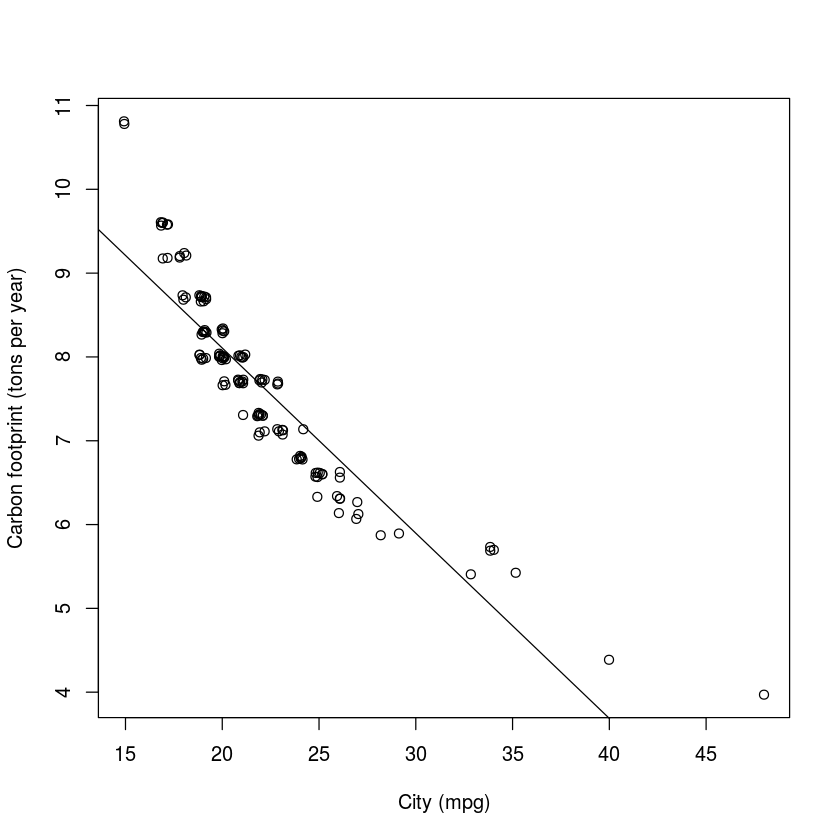

In [3]:
## Example
install.packages("fpp")
library(fpp)

plot(jitter(Carbon) ~ jitter(City),xlab="City (mpg)",
  ylab="Carbon footprint (tons per year)",data=fuel)
fit <- lm(Carbon ~ City, data=fuel); abline(fit)
summary(fit)


The estimated regression line is: $\hat{y}=12.53-0.22x.$

Intercept: $\hat{\beta}_0=12.53$. A car that has fuel economy of $0$ mpg in city driving conditions can expect an average carbon footprint of $12.53$ tonnes per year. The interpretation of the intercept requires that a value of $x=0$ makes sense. But even when $x=0$ does not make sense, the intercept is an important part of the model.

Slope: $\hat{\beta}_1=-0.22$. For every extra mile per gallon, a car’s carbon footprint will decrease on average by 0.22 tonnes per year. Alternatively, if the fuel economies of two cars differ by 1 mpg in city driving conditions, their carbon footprints will differ, on average, by 0.22 tonnes per year.


## Evaluating the regression model

Recall that each residual is the unpredictable random component of each observation and is defined as 

$$e_i=y_i-\hat{y}_i, $$ 

for $i=1,\ldots,N$. 

We would expect the residuals to be randomly scattered without showing any systematic patterns. A simple and quick way for a first check is to examine a scatterplot of the residuals against the predictor variable.

A non-random pattern may indicate that a non-linear relationship may be required, or some heteroscedasticity is present (i.e., the residuals show non-constant variance), or there is some left over serial correlation (only when the data are time series).

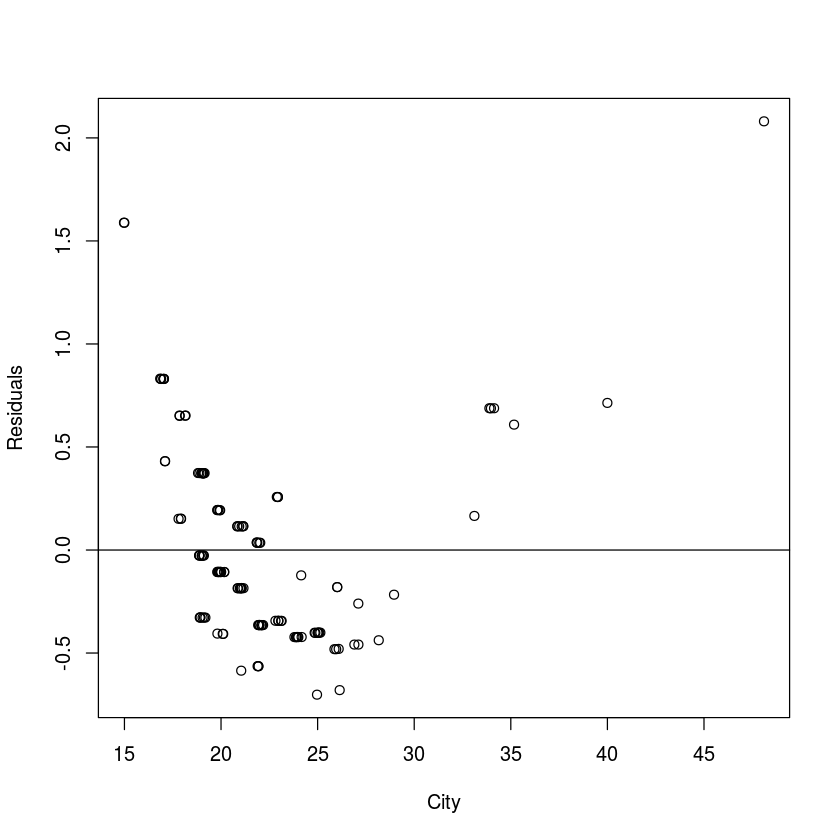

In [4]:
## Residual plots

res <- residuals(fit)
plot(jitter(res)~jitter(City), ylab="Residuals", xlab="City", data=fuel)
abline(0,0)

## Outliers and influential observations
Observations that take on extreme values compared to the majority of the data are called *outliers*. Observations that have a large influence on the estimation results of a regression model are called *influential observations*. Usually, influential observations are also outliers that are extreme in the $x$ direction.

Example: Predict the weight of 7 year old children by regressing weight against height. Two identical samples except for an outlier. 

1. child who weighs 35kg and is 120cm tall. 
2. child who also weighs 35kg but is much taller at 150cm (so more extreme in the x direction). 

***

![The effect of outliers and influential observations on regression.](https://www.otexts.org/sites/default/files/resize/fpp/images/fig_4_outliers-570x576.png)

Black: excluding outliers. Red: with outliers.


## Goodness-of-fit

A common way to summarize how well a linear regression model fits the data is via the coefficient of determination or $R^2$:

$$R^2 = \frac{\sum(\hat{y}_{i} - \bar{y})^2}{\sum(y_{i}-\bar{y})^2}, $$ 

where the summations are over all observations. Thus, it is also **the proportion of variation in the forecast variable that is accounted for (or explained) by the regression model**.

In all cases, $0 \leq R^2 \leq 1$. In simple linear regression, the value of $R^2$ is also equal to the square of the correlation between $y$ and $x$.

Note: validating a model’s out-of-sample forecasting performance is much better than measuring the in-sample $R^2$.


## Standard error of the regression

Another measure of how well the model has fitted the data is the standard deviation of the residuals, which is often known as the *standard error of the regression*:

$$s_e=\sqrt{\frac{1}{N-2}\sum_{i=1}^{N}{e_i^2}}.$$

Here, we divide by $N−2$ because we have estimated two parameters (the intercept and slope) in computing the residuals. Normally, we only need to estimate the mean (i.e., one parameter) when computing a standard deviation. The divisor is always $N$ minus the number of parameters estimated in the calculation.


## Forecasting with regression

Forecasts from a simple linear model are obtained using the equation $$\hat{y}=\hat{\beta}_0+\hat{\beta}_1 x $$ where $x$ is the value of the predictor for which we require a forecast.

When this calculation is done using an observed value of $x$ from the data, we call the resulting value of $\hat{y}$ a *fitted value*. This is not a genuine forecast as the actual value of $y$ for that predictor value was used in estimating the model. 

When the values of $x$ is a new value (i.e., not part of the data that were used to estimate the model), the resulting value of $\hat{y}$ is a genuine forecast.

***

Assuming that the regression errors are normally distributed, an approximate 95% **forecast interval** (also called a prediction interval) associated with this forecast is given by 

$$\hat{y} \pm 1.96 s_e\sqrt{1+\frac{1}{N}+\frac{(x-\bar{x})^2}{(N-1)s_x^2}},$$

where $N$ is the total number of observations, $\bar{x}$ is the mean of the observed $x$ values, $s_x$ is the standard deviation of the observed $x$ values and $s_e$ is the standard error of the regression. 

If R is used to obtain forecast intervals, more exact calculations are obtained (especially for small values of $N$).

***

The forecast interval is wider when $x$ is far from $\bar{x}$. That is, we are more certain about our forecasts when considering values of the predictor variable close to its sample mean.

For a car with City driving fuel economy $x=30$ mpg, the average footprint forecasted is $\hat{y}=5.90$ tons of CO$_2$ per year. The corresponding 95% forecast interval is $\lbrack 4.95, 6.84 \rbrack$ (calculated using R).

***

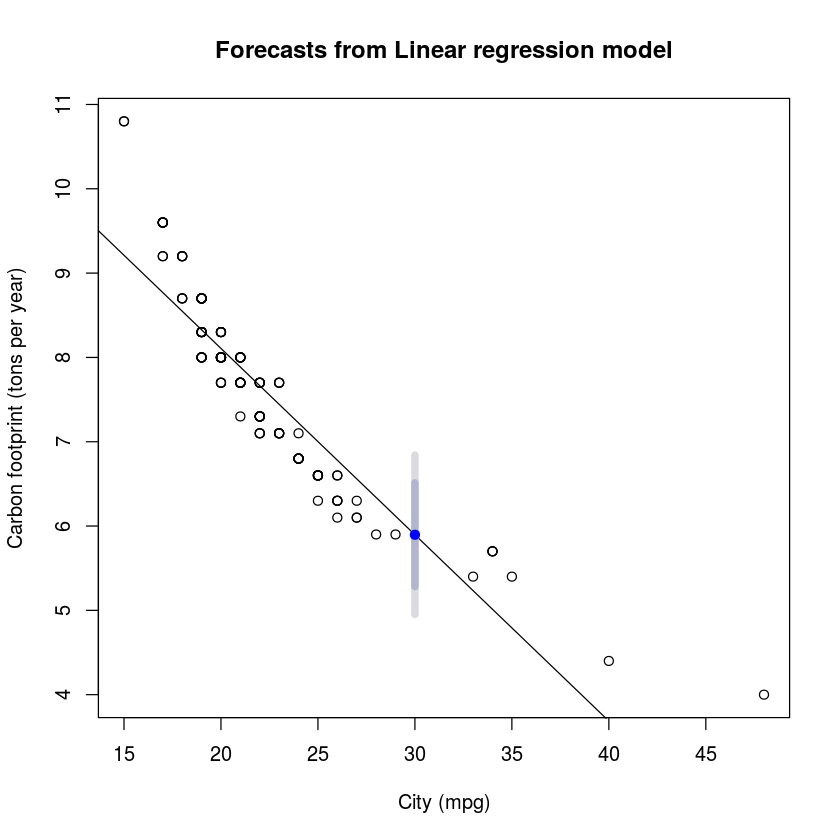

In [5]:
#fitted(fit)[1]
fcast <- forecast(fit, newdata=data.frame(City=30))
plot(fcast, xlab="City (mpg)", ylab="Carbon footprint (tons per year)")

## Statistical inference

As well as being used for forecasting, simple linear regression models are also valuable in studying the historical effects of predictors.

You may be interested in testing whether the predictor variable $x$ has had an identifiable effect on $y$, or if there is enough evidence to show that $x$ and $y$ are related.

If $x$ and $y$ are unrelated, then the slope parameter $\beta_1=0$. So we can construct a *statistical hypothesis test* to see if it is plausible that $\beta_1=0$ given the observed data.


## Hypothesis testing

The logic of hypothesis tests is to assume the thing you want to disprove, and then to look for evidence that the assumption is wrong. In this case, we assume that there is no relationship between $x$ and $y$. This is called the *null hypothesis* and is stated as

$$H_0:\beta_1=0. $$

Evidence against this hypothesis is provided by the value of $\hat{\beta}_1$, the slope estimated from the data. If $\hat{\beta}_1$ is very different from zero, we conclude that the null hypothesis is incorrect and that the evidence suggests there really is a relationship between $x$ and $y$.


## P-value

To determine how big the difference between $\hat{\beta}_1$ and $\beta_1$ must be before we would reject the null hypothesis, we calculate the probability of obtaining a value of $\beta_1$ as large as we have calculated if the null hypothesis were true. This probability is known as the *P-value*.

In [6]:
summary(fit)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),12.5256471,0.199232055,62.86964,2.950712e-100
City,-0.2209704,0.008877788,-24.89025,1.065904e-51


## Confidence intervals

It is also sometimes useful to provide an interval estimate for $\beta_1$, usually referred to as a *confidence interval* (and not to be confused with a forecast or prediction interval).

In [7]:

confint(fit,level=0.95)


,2.5 %,97.5 %
(Intercept),12.1315464,12.9197478
City,-0.2385315,-0.2034092


If the $100(1-\alpha)\%$ confidence interval for a parameter does not contain 0, then the associated P-value must be less than $\alpha$.


## Non-linear functional forms

Simply transforming variables $y$ and/or $x$ and then estimating a regression model using the transformed variables is the simplest way of obtaining a non-linear specification. 

The most commonly used transformation is the (natural) logarithmic. Recall that in order to perform a logarithmic transformation to a variable, all its observed values must be greater than zero.

A *log-log* functional form is specified as 

$$\log y_i=\beta_0+\beta_1 \log x_i + \varepsilon_i. $$ 

In this model, the slope $\beta_1$ can be interpeted as an elasticity: $\beta_1$ is the average percentage change in $y$ resulting from a $1\%$ change in $x$.

***

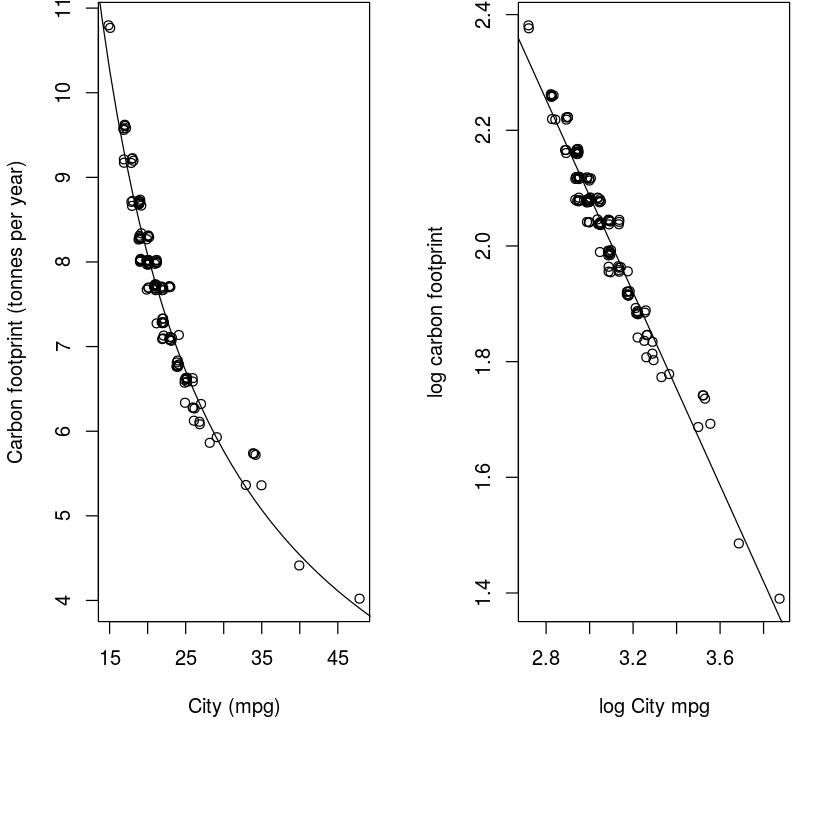

In [8]:
par(mfrow=c(1,2), mar=c(9,4,0,2)+0.1)
fit2 <- lm(log(Carbon) ~ log(City), data=fuel)
plot(jitter(Carbon) ~ jitter(City), xlab="City (mpg)",
  ylab="Carbon footprint (tonnes per year)", data=fuel)
lines(1:50, exp(fit2$coef[1]+fit2$coef[2]*log(1:50)))
plot(log(jitter(Carbon)) ~ log(jitter(City)), 
  xlab="log City mpg", ylab="log carbon footprint", data=fuel)
abline(fit2)

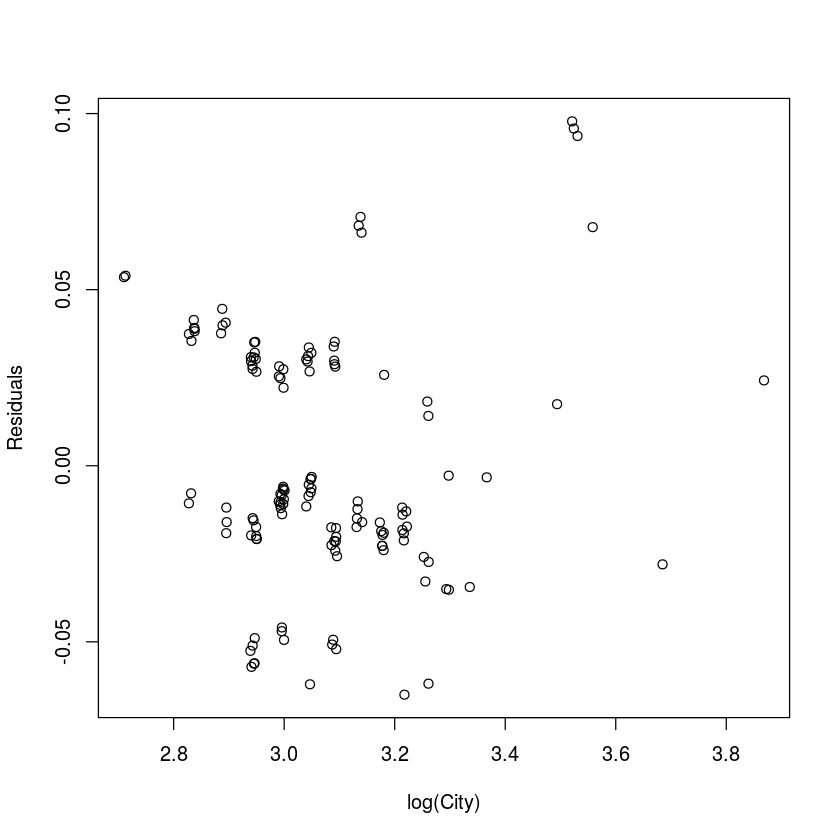

In [9]:
res <- residuals(fit2)
plot(jitter(res, amount=.005) ~ jitter(log(City)), 
  ylab="Residuals", xlab="log(City)", data=fuel)

The residuals more randomly scattered 

***

| Model      | Functional form                | Slope        | Elasticity        |
|------------|--------------------------------|--------------|-------------------|
| linear     | $y=\beta_0+\beta_1x$           | $\beta_1$    | $\beta_1x/y$      |
| log-log    | $\log y=\beta_0+\beta_1\log x$ | $\beta_1y/x$ | $\beta_1$         |
| linear-log | $y=\beta_0+\beta_1\log x$      | $\beta_1/x$  | $\beta_1/y$       |
| log-linear | $\log y=\beta_0+\beta_1x$      | $\beta_1y$   | $\beta_1x$        |


Summary of selected functional forms. Elasticities that depend on the observed values of y and x are commonly calculated for the sample means of these.

***

![The four non-linear forms](https://www.otexts.org/sites/default/files/resize/fpp/images/fig_4_nlforms-570x338.png)

The four non-linear forms.


## Regression with time series data

When using regression for prediction, we are often considering time series data and we are aiming to forecast the future. 

Using a regression model to forecast time series data poses a challenge in that future values of the predictor variable are needed to be input into the estimated model, but these are not known in advance. One solution to this problem is to use *scenario based forecasting*.

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.5206165,0.06230723,8.355637,2.787155e-14
income,0.3186605,0.05225926,6.097685,7.613918e-09


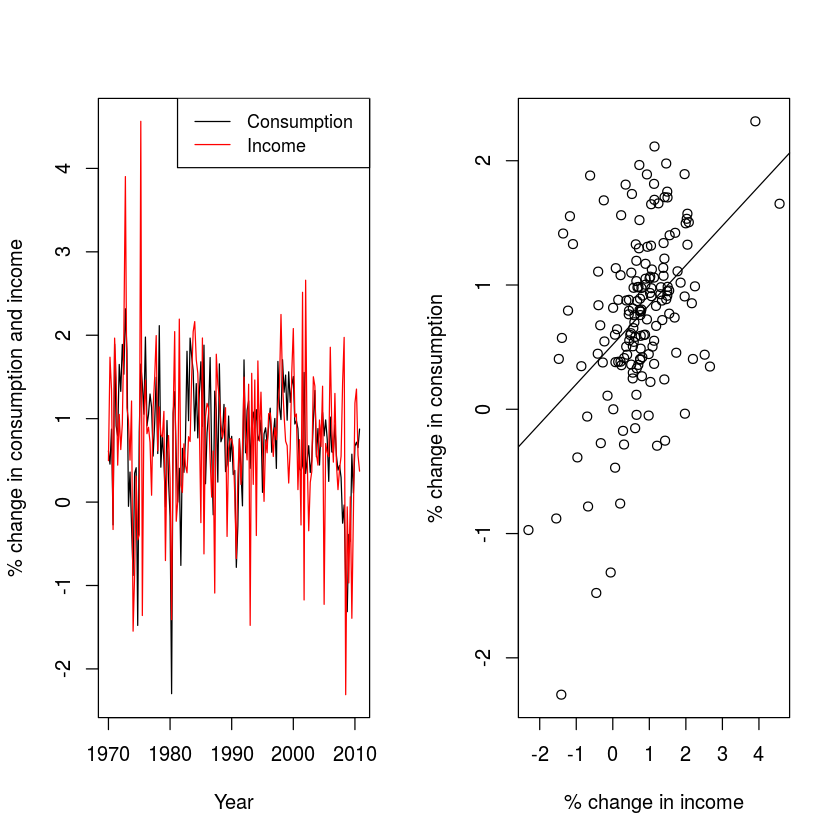

In [10]:
## Example


par(mfrow=c(1,2))
fit.ex3 <- lm(consumption ~ income, data=usconsumption)
plot(usconsumption, ylab="% change in consumption and income",
  plot.type="single", col=1:2, xlab="Year")
legend("topright", legend=c("Consumption","Income"),
 lty=1, col=c(1,2), cex=.9)
plot(consumption ~ income, data=usconsumption, 
 ylab="% change in consumption", xlab="% change in income")
abline(fit.ex3)
summary(fit.ex3)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.5206165,0.06230723,8.355637,2.787155e-14
income,0.3186605,0.05225926,6.097685,7.613918e-09


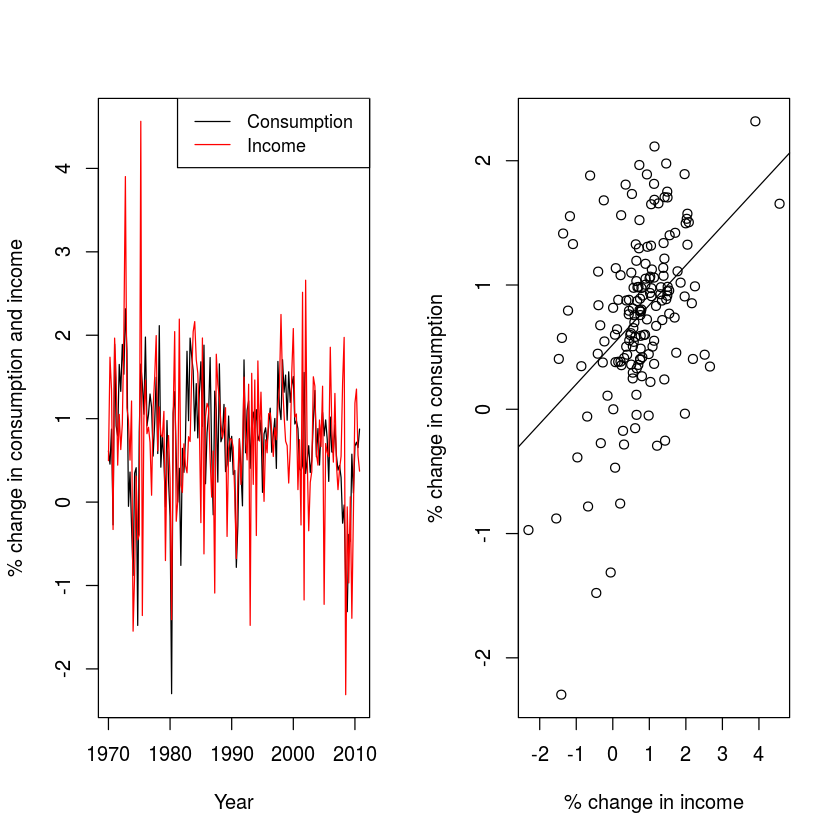

In [11]:
par(mfrow=c(1,2))
fit.ex3 <- lm(consumption ~ income, data=usconsumption)
plot(usconsumption, ylab="% change in consumption and income",
  plot.type="single", col=1:2, xlab="Year")
legend("topright", legend=c("Consumption","Income"),
 lty=1, col=c(1,2), cex=.9)
plot(consumption ~ income, data=usconsumption, 
 ylab="% change in consumption", xlab="% change in income")
abline(fit.ex3)
summary(fit.ex3)$coef

***

The scatter plot includes the estimated regression line 

$$\hat{C}=0.52+0.32I, $$

which shows that a 1 unit (1\%) increase in personal disposable income will result to an average increase of 0.84 unit (0.84\%) in personal consumption expenditure. We are interested in forecasting consumption for the four quarters of 2011.

A policy maker may want to forecast consumption if there is a 1\% growth or a 1\% decline in income for each of the quarters in 2011.

Forecast intervals for scenario based forecasts do not include the uncertainty associated with the future values of the predictor variables. They assume the value of the predictor is known in advance.

An alternative approach is to use genuine forecasts for the predictor variable.


## Ex-ante versus ex-post forecasts

We need to distinguish between two different types of forecasts that can be produced, depending on what is assumed to be known when the forecasts are computed.

Ex ante forecasts are those that are made using only the information that is available in advance. For example, ex ante forecasts of consumption for the four quarters in 2011 should only use information that was available before 2011. These are the only genuine forecasts, made in advance using whatever information is available at the time.

Ex post forecasts are those that are made using later information on the predictors. For example, ex post forecasts of consumption for each of the 2011 quarters may use the actual observations of income for each of these quarters, once these have been observed. These are not genuine forecasts, but are useful for studying the behaviour of forecasting models.

***

The model from which ex-post forecasts are produced should not be estimated using data from the forecast period. That is, ex-post forecasts can assume knowledge of the predictor variable (the x variable), but should not assume knowledge of the data that are to be forecast (the y variable).

A comparative evaluation of ex ante forecasts and ex post forecasts can help to separate out the sources of forecast uncertainty. This will show whether forecast errors have arisen due to poor forecasts of the predictor or due to a poor forecasting model.


## Linear trend

A common feature of time series data is a trend. Using regression we can
model and forecast the trend in time series data by including
$t=1,\ldots,T,$ as a predictor variable:
$$y_t=\beta_0+\beta_1t+\varepsilon_t. $$ 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.3375346,0.100366418,3.363023,2.180467e-03
trend,0.1760746,0.005475437,32.157179,3.105644e-24


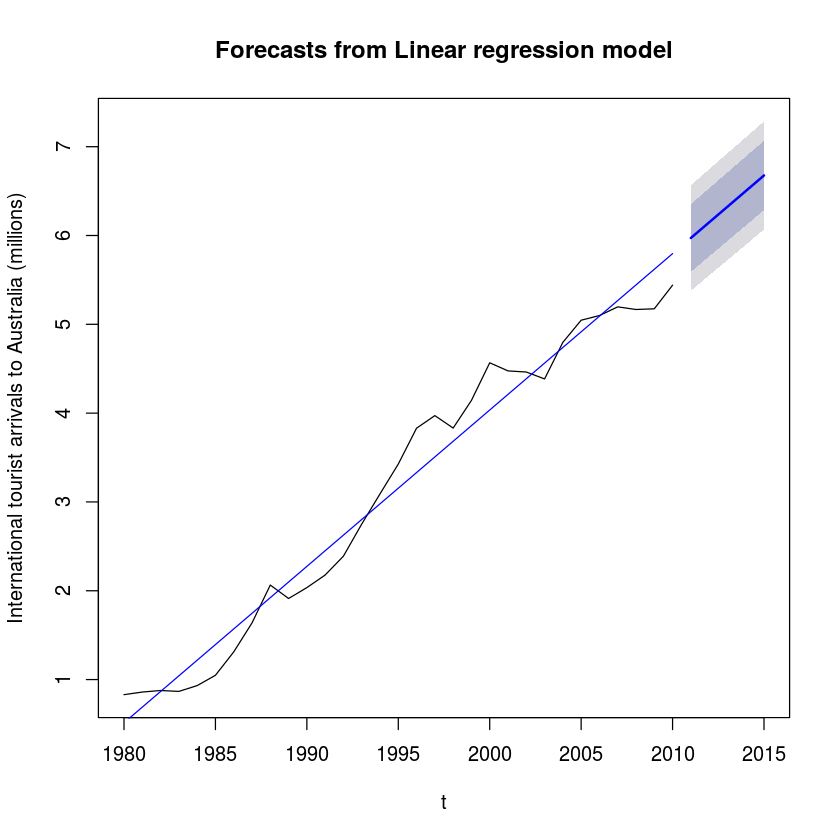

In [12]:
fit.ex4 <- tslm(austa ~ trend)
f <- forecast(fit.ex4, h=5,level=c(80,95))
plot(f, ylab="International tourist arrivals to Australia (millions)",
  xlab="t")
lines(fitted(fit.ex4),col="blue")
summary(fit.ex4)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.3375346,0.100366418,3.363023,2.180467e-03
trend,0.1760746,0.005475437,32.157179,3.105644e-24


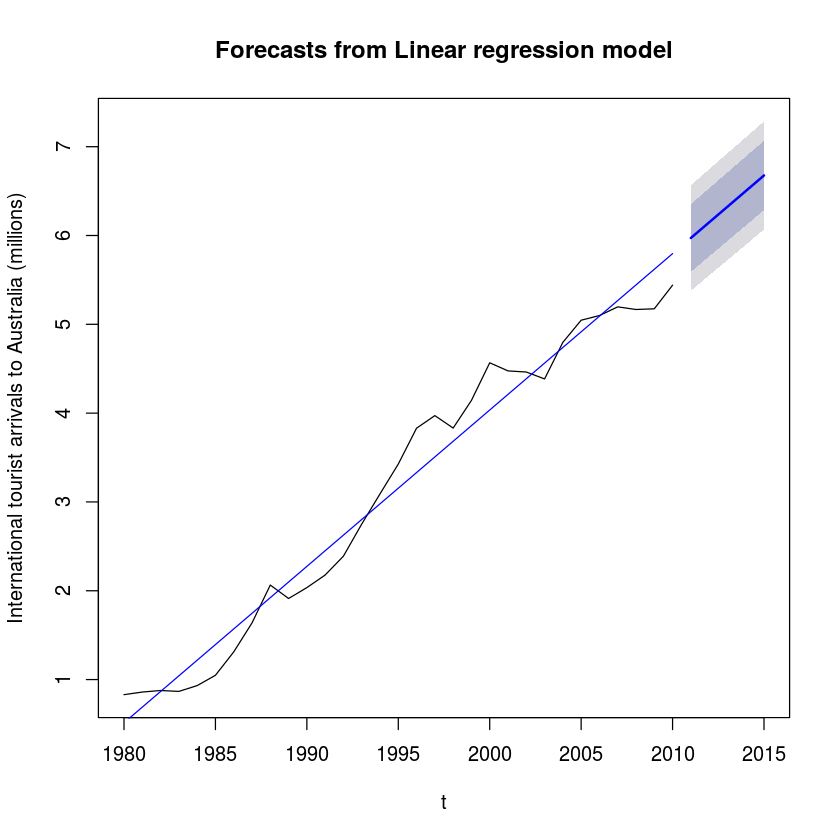

In [13]:
fit.ex4 <- tslm(austa ~ trend)
f <- forecast(fit.ex4, h=5,level=c(80,95))
plot(f, ylab="International tourist arrivals to Australia (millions)",
  xlab="t")
lines(fitted(fit.ex4),col="blue")
summary(fit.ex4)$coef

## Residual autocorrelation

With time series data it is highly likely that the value of a variable observed in the current time period will be influenced by its value in the previous period, or even the period before that, and so on. 

Therefore when fitting a regression model to time series data, it is very common to find autocorrelation in the residuals. 

In this case, the estimated model violates the assumption of no autocorrelation in the errors, and our forecasts may be inefficient — there is some information left over which should be utilized in order to obtain better forecasts. 

The forecasts from a model with autocorrelated errors are still unbiased, and so are not “wrong”, but they will usually have larger prediction intervals than they need to.

***

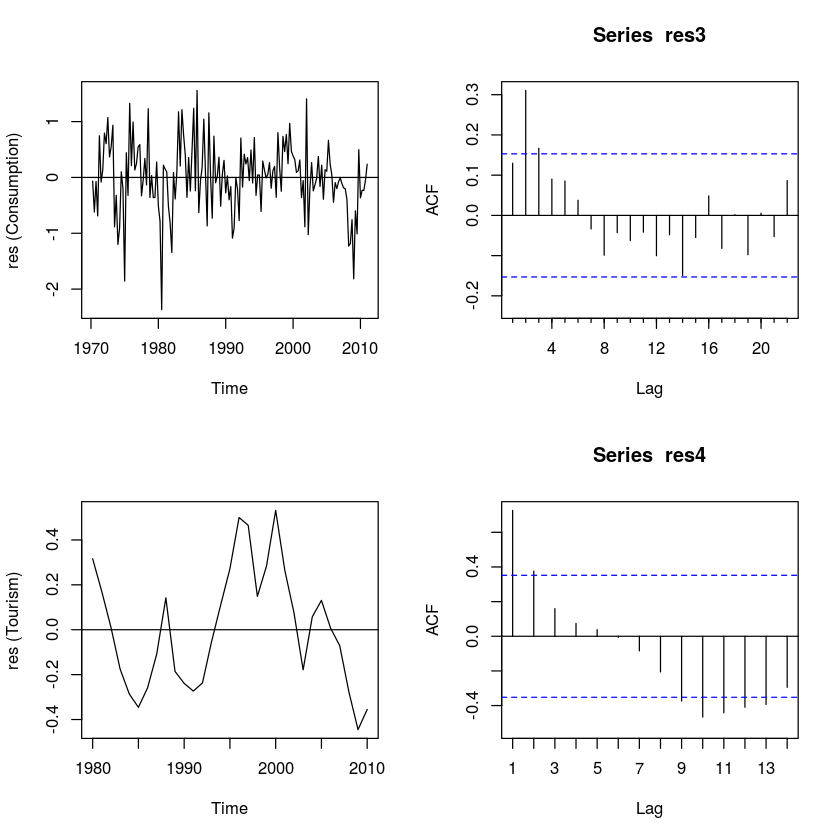

In [14]:
par(mfrow=c(2,2))
res3 <- ts(resid(fit.ex3),s=1970.25,f=4)
plot.ts(res3,ylab="res (Consumption)")
abline(0,0)
Acf(res3)
res4 <- resid(fit.ex4)
plot(res4,ylab="res (Tourism)")
abline(0,0)
Acf(res4)

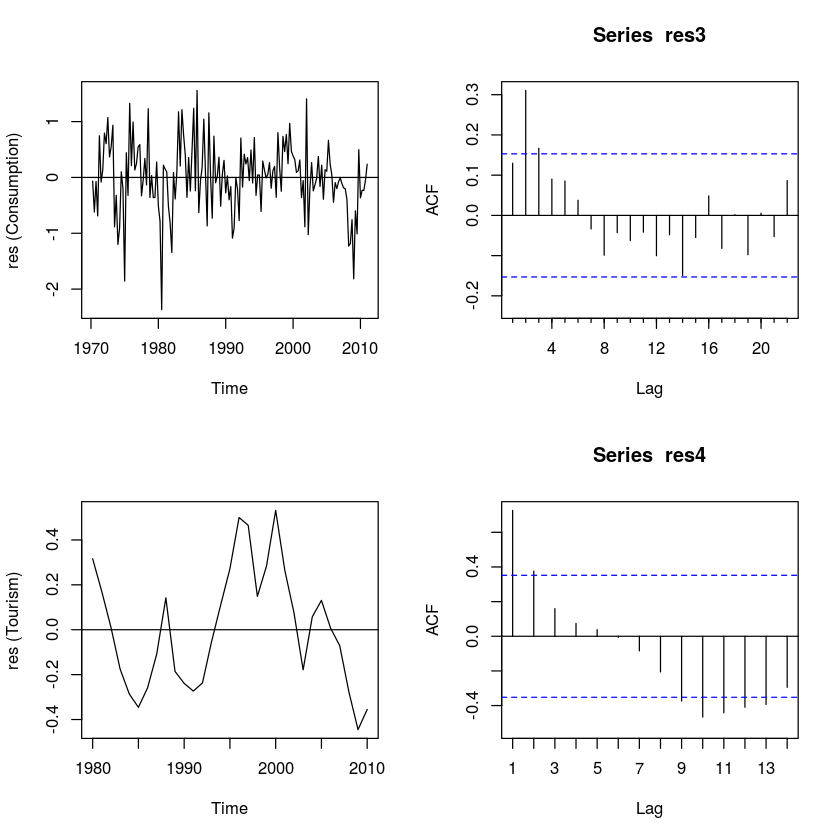

In [15]:
par(mfrow=c(2,2))
res3 <- ts(resid(fit.ex3),s=1970.25,f=4)
plot.ts(res3,ylab="res (Consumption)")
abline(0,0)
Acf(res3)
res4 <- resid(fit.ex4)
plot(res4,ylab="res (Tourism)")
abline(0,0)
Acf(res4)

## Spurious regression

More often than not, time series data are “non-stationary”; that is, the values of the time series do not fluctuate around a constant mean or with a constant variance.

For example consider the two variables, air passenger traffic in Australia and rice production in Guinea appear to be related simply because they both trend upwards in the same manner. However, they have nothing to do with each other.

Regressing non-stationary time series can lead to spurious regressions. High $R^2$s and high residual autocorrelation can be signs of spurious regression.

Cases of spurious regression might appear to give reasonable short-term forecasts, but they will generally not continue to work into the future.

***

<!---
![Trending time series data can appear to be related](https://www.otexts.org/sites/default/files/resize/fpp/images/fig_4_spurious-570x645.png)
-->
<img src="https://www.otexts.org/sites/default/files/resize/fpp/images/fig_4_spurious-570x645.png" width="600px" height="500px" />

Trending time series data can appear to be related.


## Summary of notation and terminology

- $x_i$ is observation $i$ on variable $x$.
- $y_i=\beta_0+\beta_1x_i+\varepsilon_i$ is the *simple linear model* with intercept $\beta_0$ and slope $\beta_1$. The error is denoted by $\varepsilon_i$.
- $y_i=\hat{\beta}_0+\hat{\beta}_1 x_i+e_i$ is the *estimated regression model* with intercept $\hat{\beta}_0$
and slope $\hat{\beta}_1$. The estimated error or *residual* is denoted by $e_i$.
- $\hat{y}_i=\hat{\beta}_0+\hat{\beta}_1 x_i$ is the fitted or estimated *regression line*; $\hat{y}_i$ is the *fitted value* corresponding to observation $y_i$.